# Assignment 8

## Data Analytics II

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))

In [6]:
import numpy as np   
import pandas as pd    
from tabulate import tabulate
import missingno as ms
import matplotlib.pyplot as plt 
from IPython.display import display
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [7]:
df = pd.read_csv('./Social_Network_Ads.csv')

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Preprocessing

<Axes: >

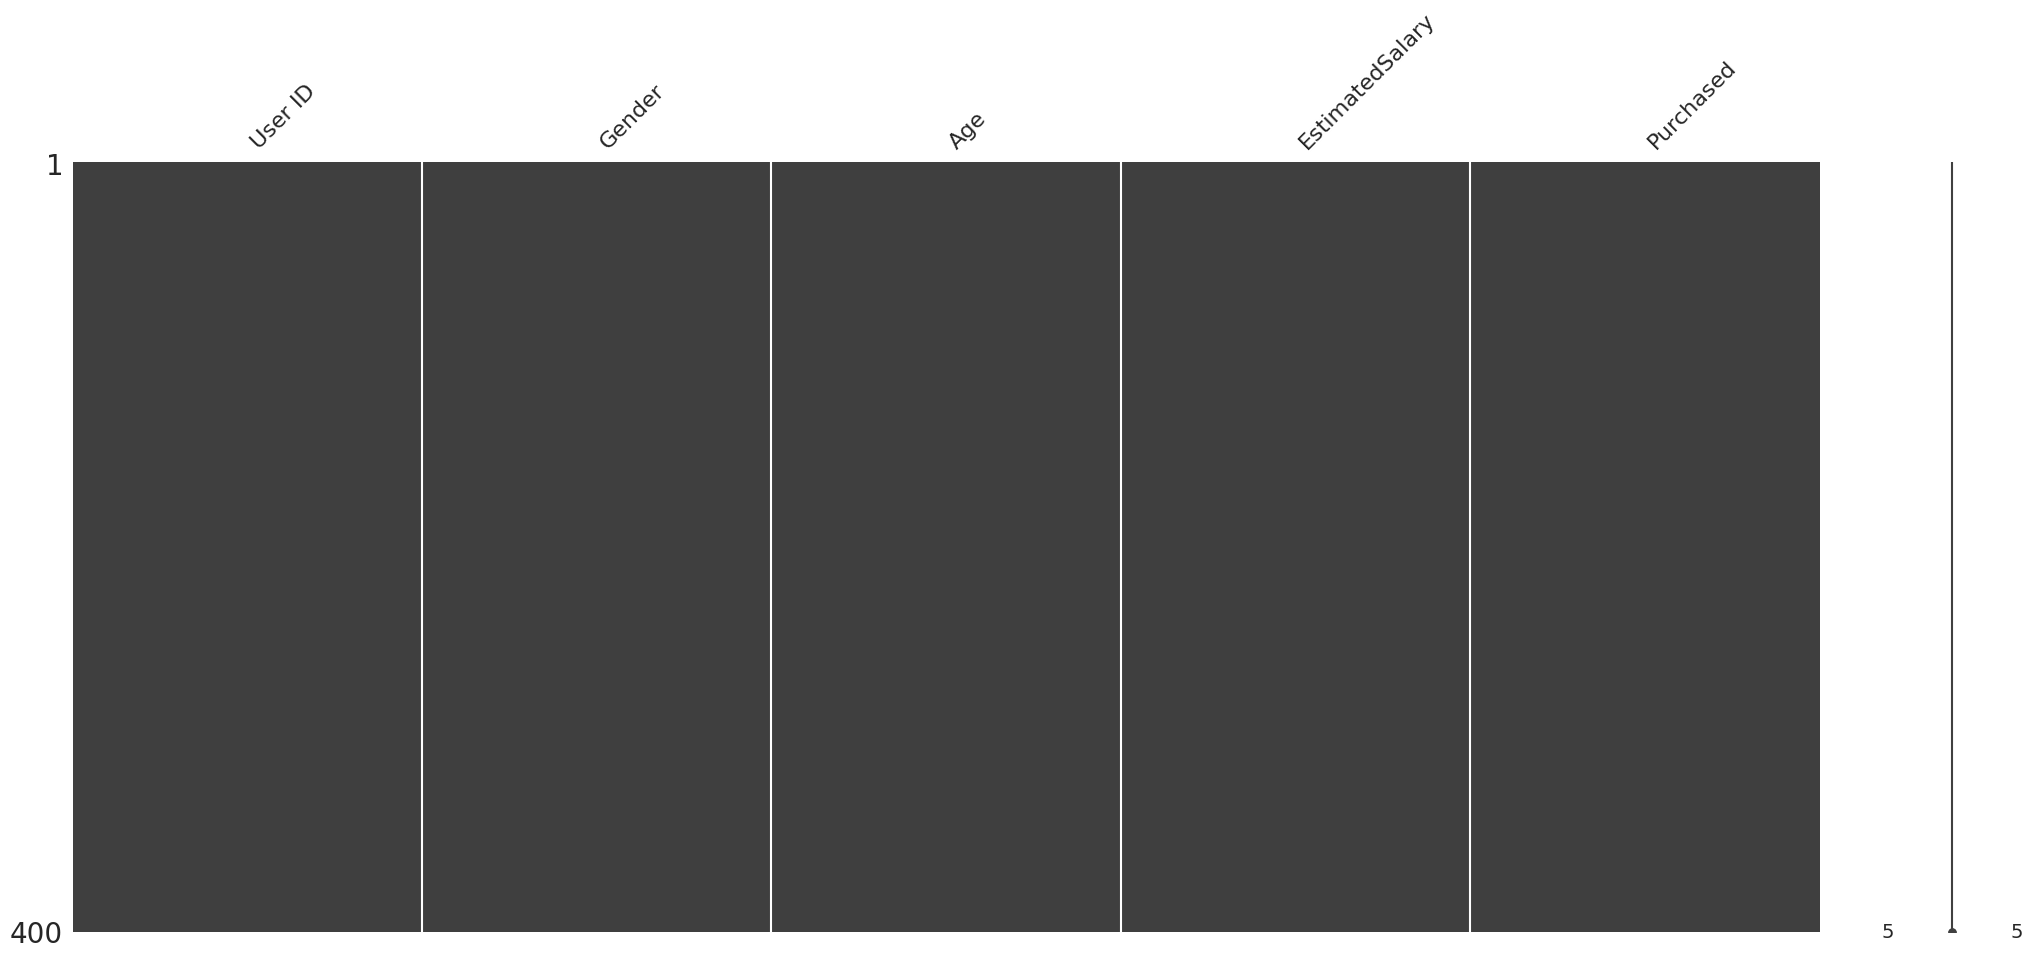

In [36]:
ms.matrix(df)

No missing values. Now label-encode Gender to 0 or 1 for processing

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

In [14]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [15]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

0 -> Female <br/>
1 -> Male

### Splitting Data into training and testing sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(columns=['User ID', 'Purchased'])
y = df['Purchased']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardise the Data

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Selecting the Model

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Obtaining Results

In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

